# Notebook to postprocess the mesoscale simulations from the future wake cluster in the Tamil Nadu coast.

Load basic packages, the importan are `xarray` and `geopandas`.

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gp
import pandas as pd
import cartopy.crs as ccrs
import cmocean   # probably you dont have this one, but it only for nice colorbars
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Introduction to the data

Results were post-processed from the mesoscale simulations of one year. Wind farms were simulated in the innermost domain (red frame from the figure below). 
<div>
<img src="WRF_domain_india.png" width="500"/>
</div>

We performed two simulation cases, **with** and **without** wind farms, hereinafter referred to as **case 0** and **case 1**, respectively. For your project, we are interested in the climate/meteorological conditions such as seasonality and atmospheric stability. Thus, I have uploaded a condensed file with more meteorological variables than the usual wind speed and direction. Let's first open the simulations without wind farms.

In [24]:
# if you don't have too much RAM then only open one at a time

#wp0 = xr.open_dataset("/groups/NIWE/POSTPRO/condense_WP0.nc")
wp0 = xr.open_dataset("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\Data_Share\\condense_WP0.nc", chunks={'time': 1000}, engine='netcdf4')

#wp1 = xr.open_dataset("/groups/NIWE/POSTPRO/condense_WP1.nc")

C:\Users\annem\AppData\Local\Temp\ipykernel_32720\998536073.py:4: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  wp0 = xr.open_dataset("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\Data_Share\\condense_WP0.nc", chunks={'time': 1000}, engine='netcdf4')


In [4]:
wp0

<xarray.Dataset> Size: 8GB
Dimensions:  (south_north: 45, west_east: 65, time: 8760, num_farm_ids: 14,
              height: 8)
Coordinates:
    XLAT     (south_north, west_east) float32 12kB ...
    XLONG    (south_north, west_east) float32 12kB ...
  * time     (time) datetime64[ns] 70kB 2020-01-08 ... 2021-01-06T23:00:09
  * height   (height) float64 64B 30.0 50.0 100.0 150.0 200.0 250.0 300.0 400.0
    x        (south_north, west_east) float64 23kB ...
    y        (south_north, west_east) float64 23kB ...
Dimensions without coordinates: south_north, west_east, num_farm_ids
Data variables:
    P_FARM   (time, num_farm_ids, south_north, west_east) float64 3GB ...
    WS       (time, height, south_north, west_east) float32 820MB ...
    WD       (time, height, south_north, west_east) float32 820MB ...
    WD_CAT   (time, height, south_north, west_east) float32 820MB ...
    STAB     (time, south_north, west_east) int64 205MB ...
    POWER    (time, south_north, west_east) float64 205MB ...
    TKE      (time, height, south_north, west_east) float32 820MB ...
    THETA    (time, height, south_north, west_east) float32 820MB ...
    PBLH     (time, south_north, west_east) float32 102MB ...
    HFX      (time, south_north, west_east) float32 102MB ...
Attributes: (12/140)
    TITLE:                            OUTPUT FROM WRF V4.2.2 MODEL
    START_DATE:                      2020-01-07_00:00:00
    SIMULATION_START_DATE:           2020-01-07_00:00:00
    WEST-EAST_GRID_DIMENSION:        433
    SOUTH-NORTH_GRID_DIMENSION:      289
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    ETAC:                            0.2
    CONST_R_DRY_AIR:                 287.0
    CONST_R_WATER:                   461.4
    CONST_RATIO_Rd_Rw:               0.622
    CONST_Cp_DRY_AIR:                1004.5
    CONST_GRAVITY:                   9.81

The file has a structure of dimensions, coordinates and variables; coordinates are needed for plotting and reference. The dimensions are divided into spatial (south_north, west_east, and height), time, and num_farm_ids. The dimensions are indexes of the data, whereas the coordinates give you the real reference of those dimensions. Variables are constructed with the dimensions; for example, the wind speed (WS) is a four dimensional variable (time, height, south_north, west_east) and needs the coordinates for plotting (I will share an example later). You can check the attributes of the dimensions, coordinates, and variables by clicking the right icon.

Variables, points, and subdomains can be accessed from the xarray instances:

In [5]:
#selecting a point in space to create a time series
point1 = wp0.isel(south_north=25,west_east=20,height=3)
point1

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 8760, num_farm_ids: 14)
Coordinates:
    XLAT     float32 4B ...
    XLONG    float32 4B ...
  * time     (time) datetime64[ns] 70kB 2020-01-08 ... 2021-01-06T23:00:09
    height   float64 8B 150.0
    x        float64 8B ...
    y        float64 8B ...
Dimensions without coordinates: num_farm_ids
Data variables:
    P_FARM   (time, num_farm_ids) float64 981kB ...
    WS       (time) float32 35kB ...
    WD       (time) float32 35kB ...
    WD_CAT   (time) float32 35kB ...
    STAB     (time) int64 70kB ...
    POWER    (time) float64 70kB ...
    TKE      (time) float32 35kB ...
    THETA    (time) float32 35kB ...
    PBLH     (time) float32 35kB ...
    HFX      (time) float32 35kB ...
Attributes: (12/140)
    TITLE:                            OUTPUT FROM WRF V4.2.2 MODEL
    START_DATE:                      2020-01-07_00:00:00
    SIMULATION_START_DATE:           2020-01-07_00:00:00
    WEST-EAST_GRID_DIMENSION:        433
    SOUTH-NORTH_GRID_DIMENSION:      289
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    ETAC:                            0.2
    CONST_R_DRY_AIR:                 287.0
    CONST_R_WATER:                   461.4
    CONST_RATIO_Rd_Rw:               0.622
    CONST_Cp_DRY_AIR:                1004.5
    CONST_GRAVITY:                   9.81

(array([0.00053971, 0.00198659, 0.00810712, 0.00687842, 0.00407653,
        0.00305453, 0.00370906, 0.00311194, 0.00171099, 0.00110238,
        0.00078086, 0.00062009, 0.00043636, 0.00048229, 0.00048229,
        0.00035598, 0.00042488, 0.00024115, 0.00032153, 0.00022966,
        0.00039043, 0.00043636, 0.00050526, 0.00117128, 0.00250333,
        0.00457031, 0.00881907, 0.01469844, 0.01506595, 0.01017408,
        0.00206698, 0.00050526, 0.00022966, 0.00017225, 0.00028708,
        0.0003445 ]),
 array([  1.33432007,  11.27540874,  21.21649742,  31.15758514,
         41.09867477,  51.0397644 ,  60.98085022,  70.92194366,
         80.86302948,  90.8041153 , 100.74520874, 110.68629456,
        120.62738037, 130.56846619, 140.50956726, 150.45065308,
        160.39173889, 170.33282471, 180.27391052, 190.2150116 ,
        200.15609741, 210.09718323, 220.03826904, 229.97935486,
        239.92044067, 249.86154175, 259.8026123 , 269.74371338,
        279.68481445, 289.62588501, 299.56698608, 309.

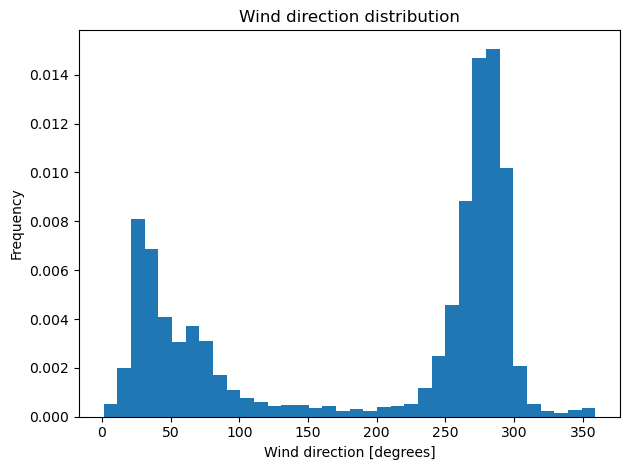

In [6]:
#creating a wind direction distribution plot from the series

fig, axs = plt.subplots(1, 1,tight_layout=True)
# add titles
axs.set_title('Wind direction distribution')
axs.set_xlabel('Wind direction [degrees]')
axs.set_ylabel('Frequency')
axs.hist(point1.WD, bins=36,density=True)
#axs[1].hist(dist2, bins=n_bins)

The accessor `isel` only works with dimentions whereareas the `sel` works with coordinates. I would recomend to use `isel` instead of `sel`. 

## Power statistics

Although **case 0** refers to simulations **without** turbines, the _potential_ power was calculated. Basically _ghost_ turbines calculated the power from the wind resource but did not apply wakes to the flow.
There are two variables in `wp0` that relate to power production: `POWER` and `P_FARM`. The first one is the production of the whole cluster, and the second is for individual wind farms. To manipulate the power information for each wind farm, we need to use the dimension `num_farm_ids`. The numbers in `num_farm_ids` go from 0 to 13, which are in order with the number assigned to each wind farm. 

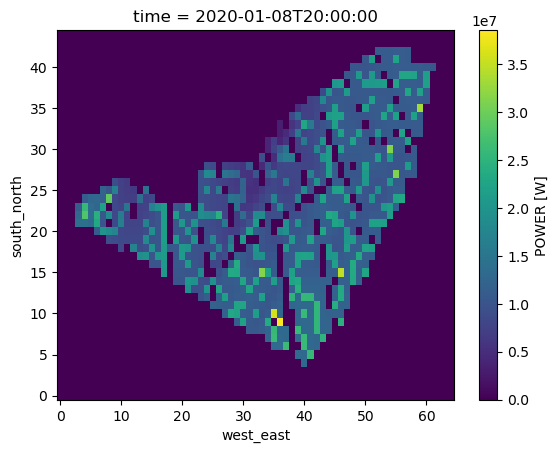

In [7]:
# POWER is a three dimnetional variable, we select a time snapshot
power_exe = wp0.isel(time=20)
power_exe['POWER'].plot()

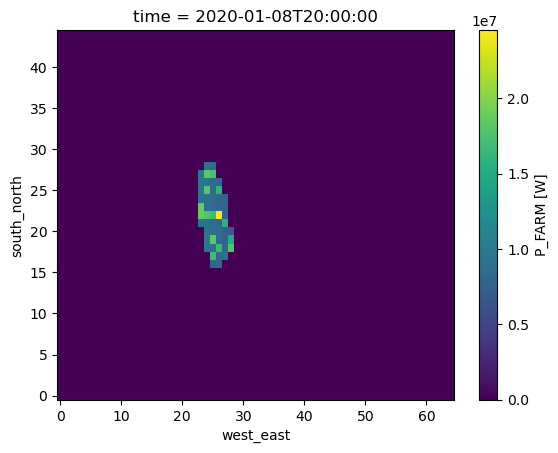

In [8]:
# We need to select one wind farm to be able to make a plot with P_FARM 
# to access wind farm 1, we need to use `num_farm_ids=0`. If we want the farm 2, then `num_farm_ids=1`
# let's pick the farm 1 
power_exe.isel(num_farm_ids=0)['P_FARM'].plot()

Notice the difference in scale in both plots. Using `P_FARM` is advantageous because we can create the spatial statistics for each farm. Let's create them for the **case 0** and **case 1**. First some definitions:

AEP from the `power` time series as:
            `(power * P_ilk / norm * 24 * 365 * 1e-9).sum()`
where `P_ilk` represents the probability of occurrence. Since we are using time series, the probability is $1/n_{total}$, in our case 1/(8760) which is similar as 1/(24*365) because we have hourly output for the whole year. `norm` is ignored for this case.

            capacity_factor = aep / (rated_power / 1e9 * 8760)
            full_load_hours = capacity_factor * 8760
            wake loss = 1 - net_aep / gross_aep
            efficiency = net_aep / gross_aep

`net_aep` and `gross_aep` is the aep from **case 1** and **case 0** respectively.


In [26]:
# opening here wp1, otherwise comment the line
#wp1 = xr.open_dataset("/groups/NIWE/POSTPRO/condense_WP1.nc")
wp1 = xr.open_dataset("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\Data_Share\\condense_WP1.nc", chunks={'time': 1000}, engine='netcdf4')

C:\Users\annem\AppData\Local\Temp\ipykernel_32720\3594353103.py:3: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1000. This could degrade performance. Instead, consider rechunking after loading.
  wp1 = xr.open_dataset("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\Data_Share\\condense_WP1.nc", chunks={'time': 1000}, engine='netcdf4')


In [10]:
# calculating AEP from simulations (GWh) in chunks to avoid MemoryError
chunk_size = 1000  # define a chunk size
gross_aep = wp0[['P_FARM', 'POWER']].isel(time=slice(0, chunk_size)).sum(dim=['time', 'south_north', 'west_east']) * 1e-9
net_aep = wp1[['P_FARM', 'POWER']].isel(time=slice(0, chunk_size)).sum(dim=['time', 'south_north', 'west_east']) * 1e-9

for i in range(chunk_size, wp0.dims['time'], chunk_size):
	gross_aep += wp0[['P_FARM', 'POWER']].isel(time=slice(i, i + chunk_size)).sum(dim=['time', 'south_north', 'west_east']) * 1e-9
	net_aep += wp1[['P_FARM', 'POWER']].isel(time=slice(i, i + chunk_size)).sum(dim=['time', 'south_north', 'west_east']) * 1e-9

C:\Users\annem\AppData\Local\Temp\ipykernel_32720\547354774.py:6: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(chunk_size, wp0.dims['time'], chunk_size):


In [11]:
# converting the xarray to a dataframe the pandas
gr_ap = gross_aep['P_FARM'].to_dataframe()
nt_ap = net_aep['P_FARM'].to_dataframe()


In [12]:
# creating a new column for the proper name, rember that we need to add a +1 to num_farm_ids
gr_ap['NAME'] = gr_ap.index +1
nt_ap['NAME'] = nt_ap.index +1

# then, changing the names of the columns
gr_ap.columns = ['gross GWh', 'NAME']
nt_ap.columns = ['net GWh', 'NAME']
gr_ap

,gross GWh,NAME
num_farm_ids,,
0,6402.509345,1
1,6319.283226,2
2,6329.358823,3
3,5927.392691,4
4,6035.132153,5
5,6096.089850,6
6,5581.091237,7
7,5540.730242,8
8,5201.735936,9


In [13]:
gdf = gr_ap.merge(nt_ap, on='NAME') # merging into one dataframe
gdf = gdf.loc[:, ['NAME', 'gross GWh', 'net GWh']] # this is not needed, but looks better
gdf

,NAME,gross GWh,net GWh
0,1,6402.509345,5076.110454
1,2,6319.283226,5019.955923
2,3,6329.358823,4998.067300
3,4,5927.392691,4752.452554
4,5,6035.132153,4736.612612
5,6,6096.089850,4601.675487
6,7,5581.091237,4501.429182
7,8,5540.730242,4688.356957
8,9,5201.735936,4241.497564
9,10,5054.160748,4184.499053


In [14]:
# calculating wake loss and efficiency 
gdf['wake loss'] = 1 - gdf['net GWh']/gdf['gross GWh']
gdf['efficiency'] = gdf['net GWh']/gdf['gross GWh']
gdf

,NAME,gross GWh,net GWh,wake loss,efficiency
0,1,6402.509345,5076.110454,0.207169,0.792831
1,2,6319.283226,5019.955923,0.205613,0.794387
2,3,6329.358823,4998.067300,0.210336,0.789664
3,4,5927.392691,4752.452554,0.198222,0.801778
4,5,6035.132153,4736.612612,0.215160,0.784840
5,6,6096.089850,4601.675487,0.245143,0.754857
6,7,5581.091237,4501.429182,0.193450,0.806550
7,8,5540.730242,4688.356957,0.153838,0.846162
8,9,5201.735936,4241.497564,0.184600,0.815400
9,10,5054.160748,4184.499053,0.172068,0.827932


To calculate the capaciy factors and full load hours we need the information of the number of turbines. We need the package `geopandas` to load the shapefile of the areas.

In [15]:
# the shapefile has geographic coordinates "epsg:4326" that are in degrees, we need to project it to UTM to calculate the areas
#gds= gp.read_file("GIS/TN_Offshore_zone.shp",crs="epsg:4326").to_crs(32643) # transfrom to  UTM Zone 43 (32643)
gds = gp.read_file("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\GIS\\TN_Offshore_zone.shp", crs="epsg:4326").to_crs(32643)

c:\Users\annem\miniconda3\envs\thesis\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


<Axes: >

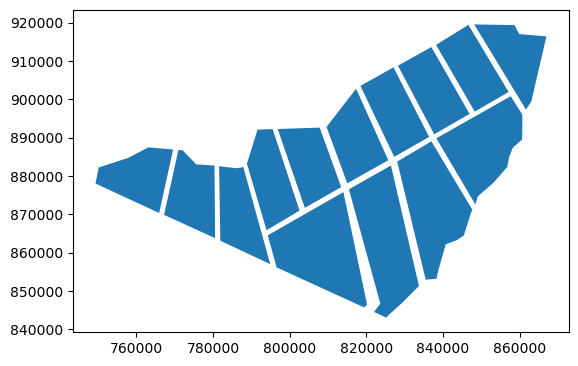

In [16]:
gds.plot()

**case 0** and **case 1** simulations were performed with the target of homogenous capacity density over these wind farms. Because the capacity density is fixed (5 MW/km2) but the area are differnt sizes, so the number of wind turbines.

In [17]:

target = 5 # MW/km2
tech = 15 # mw, we chose the technology as the 15 MW IEA turbine

# in geopandas you can modify the attribute table, so it is like a dataframe
# you can access the area by `.geometry.area`
gds['Area_km2'] = gds.geometry.area / 1000000  # km
gds['Number_of_turbines'] = np.round(target/tech*gds['Area_km2'])

# we want to merge this information with the previous dataset
# we need to change this columns to numbers to make it possible to merge
gds["NAME"] = pd.to_numeric(gds["NAME"]) # this is for merge
gds

,NAME,LAYER,geometry,Area_km2,Number_of_turbines
0,1,<B>PERIMETER</B> = 63.756 km<BR><B>ENCLOSED_AR...,"POLYGON ((791597.625 892117.057, 795545.558 89...",208.337045,69.0
1,2,<B>PERIMETER</B> = 60.114 km<BR><B>ENCLOSED_AR...,"POLYGON ((796861.832 892270.204, 807813.203 89...",202.858277,68.0
2,3,<B>PERIMETER</B> = 60.959 km<BR><B>ENCLOSED_AR...,"POLYGON ((809599.787 892803.887, 817320.617 90...",208.861515,70.0
3,4,<B>PERIMETER</B> = 61.24 km<BR><B>ENCLOSED_ARE...,"POLYGON ((818454.593 903529.899, 827062.16 908...",208.061345,69.0
4,7,<B>PERIMETER</B> = 60.917 km<BR><B>ENCLOSED_AR...,"POLYGON ((828238.023 908791.888, 836955.788 91...",208.076641,69.0
5,9,<B>PERIMETER</B> = 60.62 km<BR><B>ENCLOSED_ARE...,"POLYGON ((838180.587 914224.122, 846618.227 91...",204.081467,68.0
6,10,<B>PERIMETER</B> = 66.167 km<BR><B>ENCLOSED_AR...,"POLYGON ((848133.816 919562.661, 858661.667 91...",202.775903,68.0
7,11,<B>PERIMETER</B> = 76.028 km<BR><B>ENCLOSED_AR...,"POLYGON ((857650.227 900819.519, 860683 896059...",329.534290,110.0
8,12,<B>PERIMETER</B> = 87.283 km<BR><B>ENCLOSED_AR...,"POLYGON ((836956.099 889046.08, 847664.99 8711...",380.060943,127.0
9,14,<B>PERIMETER</B> = 93.826 km<BR><B>ENCLOSED_AR...,"POLYGON ((826416.499 882752.887, 833719.772 85...",391.391325,130.0


In [18]:
# merging the wake results (gdf) in to the shapefile geopandas (gds)
gds = gds.merge(gdf, on='NAME') # merging into one dataframe
gds.columns

Index(['NAME', 'LAYER', 'geometry', 'Area_km2', 'Number_of_turbines',
       'gross GWh', 'net GWh', 'wake loss', 'efficiency'],
      dtype='object')

In [19]:
# We keep doing the calculations on `gds` 
gds['Installed capacity GW'] = gds['Number_of_turbines'] *0.015 #15 mw to GW

# capacity factos
gds['CF_gross'] = gds['gross GWh'] /(gds['Installed capacity GW']*(24 * 365))
gds['CF_net'] = gds['net GWh'] /(gds['Installed capacity GW']*(24 * 365))
# full load hours: measure of the number of hours a power plant operates at its maximum output for a given period
gds['FLh_gross'] = gds['CF_gross']*(24 * 365)
gds['FLh_net'] = gds['CF_net']*(24 * 365)

# calculate the prodcution in Tera watt hours
gds['gross TWh'] = gds['gross GWh']/1000
gds['net TWh'] = gds['net GWh']/1000

gds

,NAME,LAYER,geometry,Area_km2,Number_of_turbines,gross GWh,net GWh,wake loss,efficiency,Installed capacity GW,CF_gross,CF_net,FLh_gross,FLh_net,gross TWh,net TWh
0,1,<B>PERIMETER</B> = 63.756 km<BR><B>ENCLOSED_AR...,"POLYGON ((791597.625 892117.057, 795545.558 89...",208.337045,69.0,6402.509345,5076.110454,0.207169,0.792831,1.035,0.706164,0.559869,6185.999367,4904.454545,6.402509,5.076110
1,2,<B>PERIMETER</B> = 60.114 km<BR><B>ENCLOSED_AR...,"POLYGON ((796861.832 892270.204, 807813.203 89...",202.858277,68.0,6319.283226,5019.955923,0.205613,0.794387,1.020,0.707235,0.561818,6195.375711,4921.525415,6.319283,5.019956
2,3,<B>PERIMETER</B> = 60.959 km<BR><B>ENCLOSED_AR...,"POLYGON ((809599.787 892803.887, 817320.617 90...",208.861515,70.0,6329.358823,4998.067300,0.210336,0.789664,1.050,0.688123,0.543386,6027.960784,4760.064095,6.329359,4.998067
3,4,<B>PERIMETER</B> = 61.24 km<BR><B>ENCLOSED_ARE...,"POLYGON ((818454.593 903529.899, 827062.16 908...",208.061345,69.0,5927.392691,4752.452554,0.198222,0.801778,1.035,0.653761,0.524171,5726.949459,4591.741598,5.927393,4.752453
4,7,<B>PERIMETER</B> = 60.917 km<BR><B>ENCLOSED_AR...,"POLYGON ((828238.023 908791.888, 836955.788 91...",208.076641,69.0,5581.091237,4501.429182,0.193450,0.806550,1.035,0.615566,0.496485,5392.358683,4349.206939,5.581091,4.501429
5,9,<B>PERIMETER</B> = 60.62 km<BR><B>ENCLOSED_ARE...,"POLYGON ((838180.587 914224.122, 846618.227 91...",204.081467,68.0,5201.735936,4241.497564,0.184600,0.815400,1.020,0.582162,0.474695,5099.741114,4158.330945,5.201736,4.241498
6,10,<B>PERIMETER</B> = 66.167 km<BR><B>ENCLOSED_AR...,"POLYGON ((848133.816 919562.661, 858661.667 91...",202.775903,68.0,5054.160748,4184.499053,0.172068,0.827932,1.020,0.565646,0.468316,4955.059557,4102.450052,5.054161,4.184499
7,11,<B>PERIMETER</B> = 76.028 km<BR><B>ENCLOSED_AR...,"POLYGON ((857650.227 900819.519, 860683 896059...",329.534290,110.0,9254.006619,6878.631596,0.256686,0.743314,1.650,0.640238,0.475898,5608.488860,4168.867634,9.254007,6.878632
8,12,<B>PERIMETER</B> = 87.283 km<BR><B>ENCLOSED_AR...,"POLYGON ((836956.099 889046.08, 847664.99 8711...",380.060943,127.0,11057.164478,7832.793921,0.291609,0.708391,1.905,0.662590,0.469372,5804.285815,4111.702846,11.057164,7.832794
9,14,<B>PERIMETER</B> = 93.826 km<BR><B>ENCLOSED_AR...,"POLYGON ((826416.499 882752.887, 833719.772 85...",391.391325,130.0,11439.523258,8259.221738,0.278010,0.721990,1.950,0.669683,0.483504,5866.422183,4235.498327,11.439523,8.259222


In [20]:
# esporting the results
gds = gds.to_crs(4326) # putting the shapilfe in geogrphic coordinates
#gds.to_file("GIS/Results_Offshore_wp0-1.shp",crs="epsg:4326")  # esporting to shapefile
gds.to_file("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\GIS\\Results_Offshore_wp0-1.shp")
gds.to_csv("Results_test.csv") # exporting to csv

C:\Users\annem\AppData\Local\Temp\ipykernel_32720\899170011.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gds.to_file("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\GIS\\Results_Offshore_wp0-1.shp")
c:\Users\annem\miniconda3\envs\thesis\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Number_of_turbines' to 'Number_of_'
  ogr_write(
c:\Users\annem\miniconda3\envs\thesis\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Installed capacity GW' to 'Installed'
  ogr_write(


## Plots 

In [21]:
# we need specific packages for more specialized plots
from mpl_toolkits.axes_grid1 import make_axes_locatable, inset_locator
import matplotlib.axes as maxes

# open it again if you start from here
#gds = gp.read_file("GIS/Results_Offshore_wp0-1.shp")
gds = gp.read_file("C:\\Users\\annem\\OneDrive - Danmarks Tekniske Universitet\\General\\Testing_materials\\GIS\\Results_Offshore_wp0-1.shp")
gds

,NAME,LAYER,Area_km2,Number_of_,gross GWh,net GWh,wake loss,efficiency,Installed,CF_gross,CF_net,FLh_gross,FLh_net,gross TWh,net TWh,geometry
0,1,<B>PERIMETER</B> = 63.756 km<BR><B>ENCLOSED_AR...,208.337045,69.0,6402.509345,5076.110454,0.207169,0.792831,1.035,0.706164,0.559869,6185.999367,4904.454545,6.402509,5.076110,"POLYGON ((77.64559 8.06218, 77.68139 8.06308, ..."
1,2,<B>PERIMETER</B> = 60.114 km<BR><B>ENCLOSED_AR...,202.858277,68.0,6319.283226,5019.955923,0.205613,0.794387,1.020,0.707235,0.561818,6195.375711,4921.525415,6.319283,5.019956,"POLYGON ((77.69332 8.06326, 77.79262 8.06583, ..."
2,3,<B>PERIMETER</B> = 60.959 km<BR><B>ENCLOSED_AR...,208.861515,70.0,6329.358823,4998.067300,0.210336,0.789664,1.050,0.688123,0.543386,6027.960784,4760.064095,6.329359,4.998067,"POLYGON ((77.80883 8.0673, 77.87946 8.15689, 7..."
3,4,<B>PERIMETER</B> = 61.24 km<BR><B>ENCLOSED_ARE...,208.061345,69.0,5927.392691,4752.452554,0.198222,0.801778,1.035,0.653761,0.524171,5726.949459,4591.741598,5.927393,4.752453,"POLYGON ((77.88979 8.16364, 77.96815 8.20674, ..."
4,7,<B>PERIMETER</B> = 60.917 km<BR><B>ENCLOSED_AR...,208.076641,69.0,5581.091237,4501.429182,0.193450,0.806550,1.035,0.615566,0.496485,5392.358683,4349.206939,5.581091,4.501429,"POLYGON ((77.97884 8.21053, 78.05822 8.25384, ..."
5,9,<B>PERIMETER</B> = 60.62 km<BR><B>ENCLOSED_ARE...,204.081467,68.0,5201.735936,4241.497564,0.184600,0.815400,1.020,0.582162,0.474695,5099.741114,4158.330945,5.201736,4.241498,"POLYGON ((78.06936 8.25892, 78.14624 8.30545, ..."
6,10,<B>PERIMETER</B> = 66.167 km<BR><B>ENCLOSED_AR...,202.775903,68.0,5054.160748,4184.499053,0.172068,0.827932,1.020,0.565646,0.468316,4955.059557,4102.450052,5.054161,4.184499,"POLYGON ((78.15999 8.30643, 78.25543 8.30401, ..."
7,11,<B>PERIMETER</B> = 76.028 km<BR><B>ENCLOSED_AR...,329.534290,110.0,9254.006619,6878.631596,0.256686,0.743314,1.650,0.640238,0.475898,5608.488860,4168.867634,9.254007,6.878632,"POLYGON ((78.2449 8.13647, 78.27204 8.09326, 7..."
8,12,<B>PERIMETER</B> = 87.283 km<BR><B>ENCLOSED_AR...,380.060943,127.0,11057.164478,7832.793921,0.291609,0.708391,1.905,0.662590,0.469372,5804.285815,4111.702846,11.057164,7.832794,"POLYGON ((78.05653 8.03158, 78.15234 7.86938, ..."
9,14,<B>PERIMETER</B> = 93.826 km<BR><B>ENCLOSED_AR...,391.391325,130.0,11439.523258,8259.221738,0.278010,0.721990,1.950,0.669683,0.483504,5866.422183,4235.498327,11.439523,8.259222,"POLYGON ((77.96061 7.97543, 78.02473 7.69079, ..."


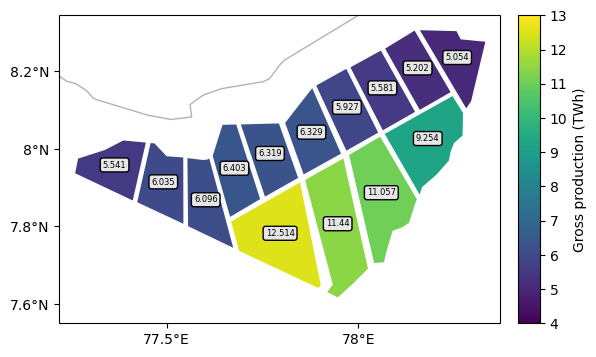

In [22]:
#matplotlib.rc('text', usetex=True) only if you have latex installed

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # ccrs.PlateCarree() is from cartopy, is geographical coordinates
ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree()) # if I set the coordinates that I want to plot
# this one is to create an ax for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%",pad=0.15, axes_class=maxes.Axes) # maxes to not inherint projection

gds.plot(ax=ax, column='gross TWh',legend=True,cax=cax, cmap='viridis',vmin=4.0,vmax=13,
         legend_kwds={"label": "Gross production (TWh)", "orientation": "vertical"})
# plot labels on the centroids of the areas
gds.apply(lambda x: ax.annotate(text=np.round(x['gross TWh'],3), xy=x.geometry.centroid.coords[0],
                                ha='center',color="black",bbox=dict(boxstyle="round", fc="0.9"),
                                **{"fontsize":6}), axis=1)

ax.coastlines('10m', alpha=0.3) # from cartoypy
ax.set_yticks([7.6,7.8,8.0,8.2], crs=ccrs.PlateCarree())
ax.set_xticks([77.5,78.0], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

#plt.savefig("Fig/gros_AEP.png", dpi=250, bbox_inches='tight')

In [27]:
# Yearly mean
print("Computing yearly mean...")
mean_wind_wp0 = wp0.mean(dim="time")
mean_wind_wp1 = wp1.mean(dim="time")

# Monthly means using groupby (efficient and fast)
print("Computing monthly means...")
monthly_means = wp0.groupby("time.month").mean(dim="time")

# Print results
for month in range(1, 13):
    print(f"Month {month}:")
    print(monthly_means.sel(month=month))


Computing yearly mean...
Computing monthly means...
Month 1:
<xarray.Dataset> Size: 936kB
Dimensions:  (num_farm_ids: 14, south_north: 45, west_east: 65, height: 8)
Coordinates:
    XLAT     (south_north, west_east) float32 12kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    XLONG    (south_north, west_east) float32 12kB dask.array<chunksize=(45, 65), meta=np.ndarray>
  * height   (height) float64 64B 30.0 50.0 100.0 150.0 200.0 250.0 300.0 400.0
    x        (south_north, west_east) float64 23kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    y        (south_north, west_east) float64 23kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    month    int64 8B 1
Dimensions without coordinates: num_farm_ids, south_north, west_east
Data variables:
    P_FARM   (num_farm_ids, south_north, west_east) float64 328kB dask.array<chunksize=(3, 9, 17), meta=np.ndarray>
    WS       (height, south_north, west_east) float32 94kB dask.array<chunksize=(2, 15, 22), meta=np.ndarray>
    WD     

In [32]:
# Get the month numbers for each time step
months = wp0['time.month']

# Mean from April (4) to October (10)
mean_apr_oct = wp0.sel(time=months.isin(range(4, 11))).mean(dim="time")

# Mean from November (11) to March (3)
mean_nov_mar = wp0.sel(time=months.isin([11, 12, 1, 2, 3])).mean(dim="time")

# Print summaries
print("April–October mean:")
print(mean_apr_oct)

print("\nNovember–March mean:")
print(mean_nov_mar)


April–October mean:
<xarray.Dataset> Size: 936kB
Dimensions:  (south_north: 45, west_east: 65, num_farm_ids: 14, height: 8)
Coordinates:
    XLAT     (south_north, west_east) float32 12kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    XLONG    (south_north, west_east) float32 12kB dask.array<chunksize=(45, 65), meta=np.ndarray>
  * height   (height) float64 64B 30.0 50.0 100.0 150.0 200.0 250.0 300.0 400.0
    x        (south_north, west_east) float64 23kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    y        (south_north, west_east) float64 23kB dask.array<chunksize=(45, 65), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east, num_farm_ids
Data variables:
    P_FARM   (num_farm_ids, south_north, west_east) float64 328kB dask.array<chunksize=(3, 9, 17), meta=np.ndarray>
    WS       (height, south_north, west_east) float32 94kB dask.array<chunksize=(2, 15, 22), meta=np.ndarray>
    WD       (height, south_north, west_east) float32 94kB dask.array<chunks

In [33]:
"""

# obtaining the mean wind speed over the year for case 0 in chunks to avoid MemoryError
chunk_size = 1000  # define a chunk size
mean_wind_wp0 = wp0.isel(time=slice(0, chunk_size)).mean(dim='time')
mean_wind_wp1 = wp1.isel(time=slice(0, chunk_size)).mean(dim='time')
for i in range(chunk_size, wp0.dims['time'], chunk_size):
	mean_wind_wp0 += wp0.isel(time=slice(i, i + chunk_size)).mean(dim='time')

mean_wind_wp0 /= (wp0.dims['time'] // chunk_size)
print(mean_wind_wp0)
# find mean for each month
monthly_means = {}
# try with pandaa or with only ws and wd
for month in range(1, 13):
    # Initialize the mean for the current month
    mean_wind_wp0_month = wp0.sel(time=wp0['time.month'] == month).isel(time=slice(0, chunk_size)).mean(dim='time')
    
    # Calculate the mean in chunks to avoid MemoryError
    for i in range(chunk_size, wp0.sel(time=wp0['time.month'] == month).dims['time'], chunk_size):
        mean_wind_wp0_month += wp0.sel(time=wp0['time.month'] == month).isel(time=slice(i, i + chunk_size)).mean(dim='time')
    
    mean_wind_wp0_month /= (wp0.sel(time=wp0['time.month'] == month).dims['time'] // chunk_size)
    
    # Store the mean for the current month in the dictionary
    monthly_means[month] = mean_wind_wp0_month

for month, mean in monthly_means.items():
    print(f'Month {month}:')
    print(mean)

# Calculate yearly mean efficiently and its circular
#mean_wind_wp0 = wp0.mean(dim="time")  

print("Computing monthly means...")
monthly_means = wp0.groupby("time.month").mean(dim="time")

# Print results
for month in range(1, 13):
    print(f"Month {month}:")
    print(monthly_means.sel(month=month))
"""


'\n\n# obtaining the mean wind speed over the year for case 0 in chunks to avoid MemoryError\nchunk_size = 1000  # define a chunk size\nmean_wind_wp0 = wp0.isel(time=slice(0, chunk_size)).mean(dim=\'time\')\nmean_wind_wp1 = wp1.isel(time=slice(0, chunk_size)).mean(dim=\'time\')\nfor i in range(chunk_size, wp0.dims[\'time\'], chunk_size):\n\tmean_wind_wp0 += wp0.isel(time=slice(i, i + chunk_size)).mean(dim=\'time\')\n\nmean_wind_wp0 /= (wp0.dims[\'time\'] // chunk_size)\nprint(mean_wind_wp0)\n# find mean for each month\nmonthly_means = {}\n# try with pandaa or with only ws and wd\nfor month in range(1, 13):\n    # Initialize the mean for the current month\n    mean_wind_wp0_month = wp0.sel(time=wp0[\'time.month\'] == month).isel(time=slice(0, chunk_size)).mean(dim=\'time\')\n    \n    # Calculate the mean in chunks to avoid MemoryError\n    for i in range(chunk_size, wp0.sel(time=wp0[\'time.month\'] == month).dims[\'time\'], chunk_size):\n        mean_wind_wp0_month += wp0.sel(time=wp0[

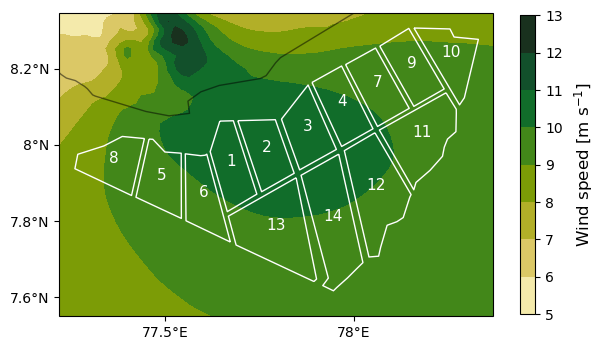

In [34]:

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

# selecting the wind at 150 m
hht = mean_wind_wp0.isel(height=3).squeeze()

# create contours
wind = ax.contourf(hht.XLONG.values,hht.XLAT.values,hht.WS.values, cmap=cmocean.cm.speed) #cmocean.cm.speed_r


# overlay the areas
gds.plot(ax=ax,facecolor="none", edgecolor="white")
gds.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center',color="white", **{"fontsize":11}), axis=1)

ax.coastlines('10m', alpha=0.5)

# colorbar
ft = {"fontsize":14}
cbar = fig.colorbar(wind, shrink=0.97)
cbar.set_label(r'Wind speed [m s$^{-1}$]',labelpad=7, **{"fontsize":12})
cbar.ax.tick_params(labelsize=10)


ax.set_yticks([7.6,7.8,8.0,8.2], crs=ccrs.PlateCarree())
ax.set_xticks([77.5,78.0], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
#for svp in ["png"]:
#    plt.savefig("Fig/Mean_wind_wp0.%s" % svp, dpi=250, bbox_inches='tight')

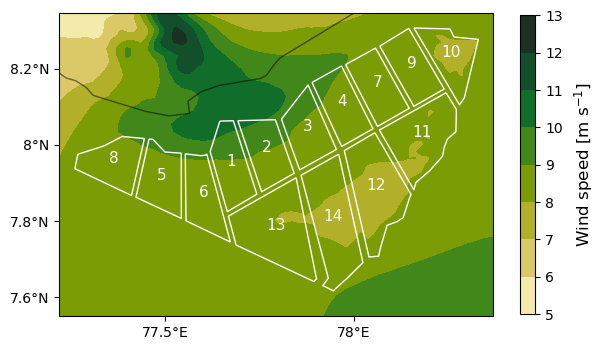

In [35]:

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

# selecting the wind at 150 m
hht = mean_wind_wp1.isel(height=3).squeeze()

# create contours
wind = ax.contourf(hht.XLONG.values,hht.XLAT.values,hht.WS.values, cmap=cmocean.cm.speed) #cmocean.cm.speed_r


# overlay the areas
gds.plot(ax=ax,facecolor="none", edgecolor="white")
gds.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center',color="white", **{"fontsize":11}), axis=1)

ax.coastlines('10m', alpha=0.5)

# colorbar
ft = {"fontsize":14}
cbar = fig.colorbar(wind, shrink=0.97)
cbar.set_label(r'Wind speed [m s$^{-1}$]',labelpad=7, **{"fontsize":12})
cbar.ax.tick_params(labelsize=10)


ax.set_yticks([7.6,7.8,8.0,8.2], crs=ccrs.PlateCarree())
ax.set_xticks([77.5,78.0], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
#for svp in ["png"]:
#    plt.savefig("Fig/Mean_wind_wp0.%s" % svp, dpi=250, bbox_inches='tight')

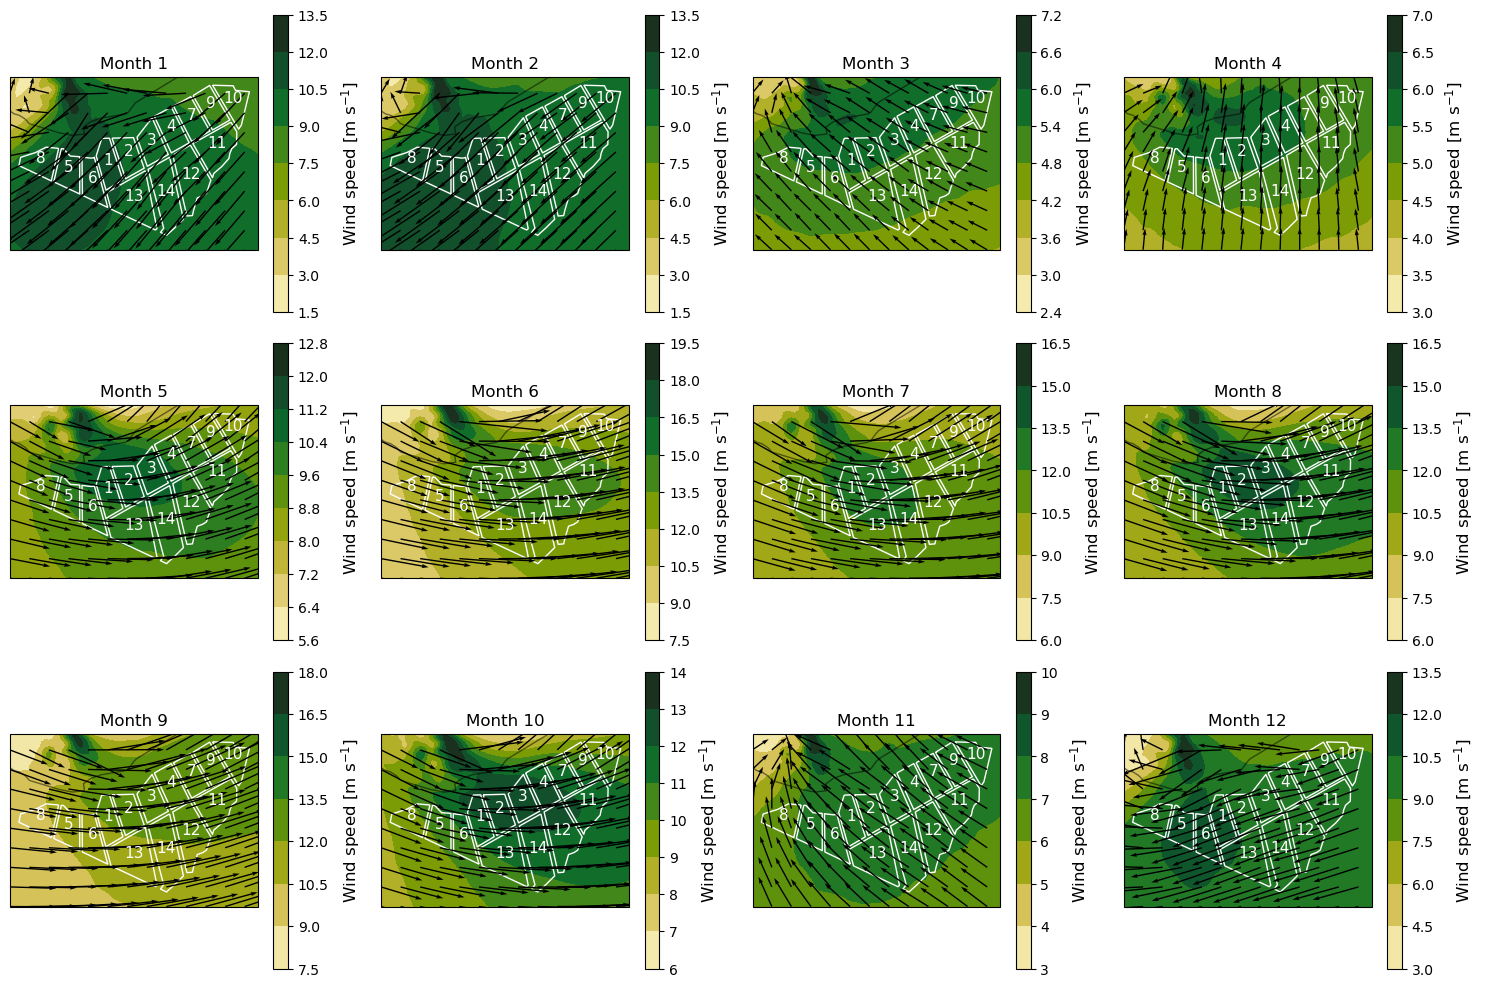

In [36]:
# Plot above wind speed map for each month

fig, axes = plt.subplots(3, 4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())
    
    # selecting the wind at 150 m
    hht = monthly_means.sel(month=month).isel(height=3).squeeze()  # Correct indexing
    
    # create contours
    wind = ax.contourf(hht.XLONG.values, hht.XLAT.values, hht.WS.values, cmap=cmocean.cm.speed)

    
    # overlay the areas
    gds.plot(ax=ax, facecolor="none", edgecolor="white")
    gds.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center', color="white", **{"fontsize":11}), axis=1)
    
    # Define a step size to reduce density (e.g., plot every 5th point)
    step = 5  

    u = -hht.WS.values[::step, ::step] * np.sin(np.deg2rad(hht.WD.values[::step, ::step]))
    v = -hht.WS.values[::step, ::step] * np.cos(np.deg2rad(hht.WD.values[::step, ::step]))


    ax.quiver(hht.XLONG.values[::step, ::step], hht.XLAT.values[::step, ::step], 
            u, v, transform=ccrs.PlateCarree(), color='black', scale=50)

    ax.coastlines('10m', alpha=0.5)
    
    # colorbar
    cbar = fig.colorbar(wind, ax=ax, shrink=0.97)
    cbar.set_label(r'Wind speed [m s$^{-1}$]', labelpad=7, **{"fontsize":12})
    cbar.ax.tick_params(labelsize=10)
    
    ax.set_title(f'Month {month}')

plt.tight_layout()
plt.show()

The next two cells are for creating custom divergence color maps and are very optional

In [37]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either 
    side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, rango=(None,None), clip=False):
        self.midlow = rango[0]
        self.midhigh = rango[1]
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midlow, self.midhigh, self.vmax], [0, 0.49,0.51, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [38]:
vmax = 0.8
vmin = -2.8
rang = (-0.2, 0.2)
norml = MidpointNormalize(rango=rang,vmin=vmin, vmax=vmax, clip=True)

center = np.array(rang)
step = .4
fst =np.arange(vmin,rang[0],step)
if fst[-1] == rang[0]:
    levs = np.concatenate([fst[:-1],center, np.arange(rang[1],vmax+step,step)[1:]])
else:
    levs = np.concatenate([fst,center, np.arange(rang[1],vmax+step,step)[1:]])


For creating difference maps we need the **case 1** simulations 

In [39]:
# obtaining the mean wind speed over the year for case 1 in chunks to avoid MemoryError
chunk_size = 1000  # define a chunk size
mean_wind_wp1 = wp1.isel(time=slice(0, chunk_size)).mean(dim='time')

for i in range(chunk_size, wp1.dims['time'], chunk_size):
	mean_wind_wp1 += wp1.isel(time=slice(i, i + chunk_size)).mean(dim='time')

mean_wind_wp1 /= (wp1.dims['time'] // chunk_size)
print(mean_wind_wp1)

months1 = wp1['time.month']
# Mean from April (4) to October (10)
mean_apr_oct1 = wp1.sel(time=months1.isin(range(4, 11))).mean(dim="time")
# Mean from November (11) to March (3)
mean_nov_mar1 = wp1.sel(time=months1.isin([11, 12, 1, 2, 3])).mean(dim="time")

C:\Users\annem\AppData\Local\Temp\ipykernel_32720\2936991963.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(chunk_size, wp1.dims['time'], chunk_size):
C:\Users\annem\AppData\Local\Temp\ipykernel_32720\2936991963.py:8: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  mean_wind_wp1 /= (wp1.dims['time'] // chunk_size)


<xarray.Dataset> Size: 936kB
Dimensions:  (south_north: 45, west_east: 65, height: 8, num_farm_ids: 14)
Coordinates:
    XLAT     (south_north, west_east) float32 12kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    XLONG    (south_north, west_east) float32 12kB dask.array<chunksize=(45, 65), meta=np.ndarray>
  * height   (height) float64 64B 30.0 50.0 100.0 150.0 200.0 250.0 300.0 400.0
    x        (south_north, west_east) float64 23kB dask.array<chunksize=(45, 65), meta=np.ndarray>
    y        (south_north, west_east) float64 23kB dask.array<chunksize=(45, 65), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east, num_farm_ids
Data variables:
    P_FARM   (num_farm_ids, south_north, west_east) float64 328kB dask.array<chunksize=(3, 9, 17), meta=np.ndarray>
    WS       (height, south_north, west_east) float32 94kB dask.array<chunksize=(2, 15, 22), meta=np.ndarray>
    WD       (height, south_north, west_east) float32 94kB dask.array<chunksize=(2, 15, 22), met

Text(0.5, 1.0, '$\\Delta$WS between cases 0 and 1')

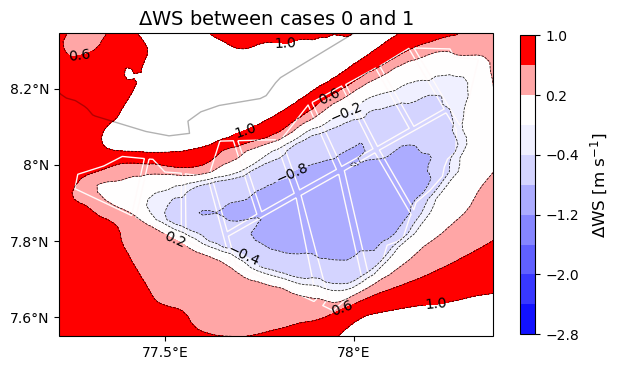

In [40]:
#matplotlib.rc('text', usetex=True)
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

# hht is the difference between the two cases
hht = mean_wind_wp1.isel(height=3).squeeze() - mean_wind_wp0.isel(height=3).squeeze()

wind = ax.contourf(hht.XLONG.values,hht.XLAT.values,hht.WS.values, cmap='bwr',levels=levs,norm=norml) #cmocean.cm.speed_r
CS = ax.contour(hht.XLONG.values,hht.XLAT.values,hht.WS.values, levels=levs, colors='black', linestyles='dashed',linewidths=0.5)
ax.clabel(CS, fontsize=10)

gds.plot(ax=ax,facecolor="none", edgecolor="snow")

ax.coastlines('10m', alpha=0.3)

ft = {"fontsize":14}
cbar = fig.colorbar(wind, shrink=0.97)
cbar.set_label(r'$\Delta$WS [m s$^{-1}$]',labelpad=7, **{"fontsize":12})
cbar.ax.tick_params(labelsize=10)

ax.set_yticks([7.6,7.8,8.0,8.2], crs=ccrs.PlateCarree())
ax.set_xticks([77.5,78.0], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set title
ax.set_title(r'$\Delta$WS between cases 0 and 1', **{"fontsize":14})
#for svp in ["png"]:
#    plt.savefig("Fig/Mean_WS_with-without_farms.%s" % svp, dpi=250, bbox_inches='tight')

### Optional section to plot windroses in centroids of the areas

we know the centroids from the shapefiles, and we would like to know the nearest point from our gridded data.

In [41]:
def index_point(lats, lons, latpoint, lonpoint):
    """Give the nearest grid points from a given coordinate
    lats and lons are the 2d corrdinates 
    latpoint, lonpoint are the points"""
    xx = lons
    yy = lats

    # Euclidean distances were used to obtain the coordinate
    # closest to the point. argmin() gives us the position in the array
    # but if you get it from a 2d matrix, it will give you the index with the
    # "flattened" matrix, that is, as if it were a vector.
    # You must then use np.unravel_index() to give you the
    # index in 2d
    dist = ((yy-latpoint)**2 + (xx-lonpoint)**2)**.5
    id_min = dist.argmin()
    return np.unravel_index([id_min], xx.shape)

In [42]:
latss = wp0['XLAT'].values
lonss = wp0['XLONG'].values

idexp = {} # here we allocate the indices 
coodex = {} # these are the real centroids
for idk, geoline in gds.iterrows():
    
    geom = geoline['geometry']
    geonam = int(geoline['NAME']) # number given by NIWE
    
    tut = geom.centroid.coords[0]
    coodex[geonam] = tut
    idexp[geonam] = index_point(latss, lonss, tut[1], tut[0],)

In [43]:
# lat lon  points for the indexing
idexp

{1: (array([22]), array([25])),
 2: (array([24]), array([30])),
 3: (array([27]), array([36])),
 4: (array([31]), array([41])),
 7: (array([33]), array([46])),
 9: (array([36]), array([51])),
 10: (array([38]), array([57])),
 11: (array([26]), array([53])),
 12: (array([18]), array([46])),
 14: (array([14]), array([40])),
 13: (array([13]), array([32])),
 6: (array([17]), array([21])),
 5: (array([20]), array([15])),
 8: (array([22]), array([8]))}

In [44]:
# real coordinates
coodex

{1: (77.67671738838445, 7.943642977463129),
 2: (77.76920316811271, 7.981839512689778),
 3: (77.87751161049684, 8.036936023057404),
 4: (77.96981313070243, 8.101174602154392),
 7: (78.06240413076601, 8.151156800312533),
 9: (78.15415787321886, 8.202611682371755),
 10: (78.25714682847489, 8.22955302688016),
 11: (78.1805140896901, 8.020361239311024),
 12: (78.05947285714544, 7.880620823315612),
 14: (77.94571743762718, 7.800500796999353),
 13: (77.79566033246056, 7.775827266253856),
 6: (77.60176241285082, 7.862348410814817),
 5: (77.4912006360244, 7.908553011006609),
 8: (77.36427238329527, 7.952284436290402)}

For the next plot you will need the package windrose https://python-windrose.github.io/windrose/usage-output.html

In [45]:
import windrose

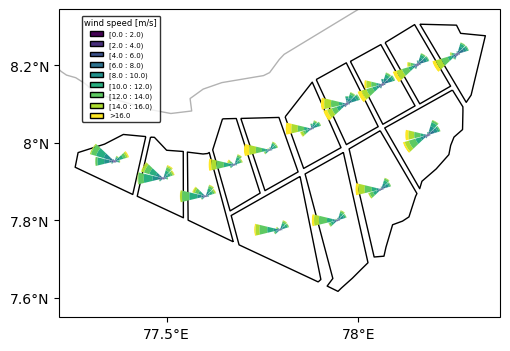

In [46]:
#matplotlib.rc('text', usetex=True)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())


gds.plot(ax=ax,facecolor="none", edgecolor="black")


pon_nc = {} # save all points for latter
for x in coodex:
    # Real coordinates of the centroids
    cham_lon, cham_lat = coodex[x]

    # selecting the points from the datasets at 150 m
    pont1 = wp0.isel(south_north=idexp[x][0][0],west_east=idexp[x][1][0],height=3)
    pon_nc[x] = pont1
    # Inset axe it with a fixed size
    wrax_cham = inset_locator.inset_axes(ax,
            width=0.52,                             # size in inches
            height=0.52,                            # size in inches
            loc='center',                        # center bbox at given position
            bbox_to_anchor=(cham_lon, cham_lat), # position of the axe
            bbox_transform=ax.transData,    # use data coordinate (not axe coordinate)
            axes_class=windrose.WindroseAxes,    # specify the class of the axe
            )
    
    fnt1 = {'fontsize': 13}
    bins= np.arange(0,18,2)
    #lev = np.arange(2,20,4)
    
    wrax_cham.bar(pont1['WD'],pont1['WS'],normed=True,bins=bins, opening=.9, nsector=12,)
    wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
    wrax_cham.axis('off')

leg_wind = wrax_cham.legend(bbox_to_anchor=(-.2 , 1.2), title='wind speed [m/s]', title_fontsize=6,
                     fontsize=5, edgecolor='black')

ax.coastlines('10m', alpha=0.3)
ax.set_yticks([7.6,7.8,8.0,8.2], crs=ccrs.PlateCarree())
ax.set_xticks([77.5,78.0], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

#for svp in ["pdf","png"]:
#    plt.savefig("Fig/Wind_rose_wp0.%s" % svp, dpi=350, bbox_inches='tight')

### Highly optional plots 
The following are highly optional plots and fuctions to do analysis by hour and month. These functions and plots are less documented that the others. You can grap inspirations from here for the seasonal analysis. For example, you can create the mean-season plot and see how the resource is; it would also be interesting to see the plot of the wind direction or see the vectors. As as task, you can try to create the vectors maps for the season, just consider how to average vectors.

In [47]:

def sector_intervals(nsec=12):
    """Sector for windrose.
    The initial sector will be always 0 (North)"""

    sect = {}

    val = 360/(nsec*2)
    y1 = 360 - val
    y2 = val
    for x in range(nsec +1)[1:]:
        if x == 1:
            sect[0] = (y1, y2 - 0.000001)
            y1 = 0 - val    # the value is re-assigned , this is a set off point
        else:
            y1 = y1 + 2*val
            y2 = y2 + 2*val
            sect[2*val*(x-1)] = (y1, y2 - 0.000001)
    return sect

def cat_assig(dr,sect,wd='WD'):
    """ ds: Dataframe 
        wd: Name of wind direction
        sect: intervals from fuction"""
    ds = dr.copy()
    for xx in sect:
        if xx == 0:
            ds.loc[ds[wd] <=sect[xx][1], 'cat'] = xx
            ds.loc[ds[wd] >=sect[xx][0], 'cat'] = xx
        else:
            ds.loc[(ds[wd]<=sect[xx][1]) & (ds[wd]>=sect[xx][0]), 'cat'] = xx
    return ds

def angle_time(ds, cat, time='hour'):
    """Analysis of the most frequent wind with direction per hour or per month
    for the given point.
    input:
    ds: Pandas daframe
    time: String to define the time window {'hour','month'}
    cat: String of the name of the column where the categories are """
    if time=='hour':
        gp = ds.index.hour
    elif time=='month':
        gp = ds.index.month

    grouped = ds.groupby(gp) #grouping by hours/month
    size = grouped[cat].count() #data size per hour/month
    # group by categories and hours/month
    coun = ds.groupby([gp, cat]).count()['WD']
    # find the category with the most frequencies
    ind_cat = coun.groupby(level=0).idxmax()
    max_sect = pd.Series([ind_cat[x][1] for x in ind_cat.index])
    max_sect.index = ind_cat.index
    # maximum count per category
    conteo = coun.groupby(level=0).max()
    # relative frequency of the maximum
    frec = conteo/size*100
    return pd.DataFrame({'sector':max_sect, 'frecuencia':frec})


In [48]:
# number of sectors
se = 12

collect_p = {}
for xx in pon_nc:
    collect_p[xx] = {}
    M0 = collect_p[xx]
    wind = pon_nc[xx][['WS','WD']].to_dataframe()[['WS','WD']]
    wind = cat_assig(wind,sector_intervals(nsec=se),wd='WD')

    # hourly wind
    grouped_hour = wind.groupby(wind.index.hour)
    M0['mean_h'] = grouped_hour['WS'].agg(["mean", "std"])
    # monthly mean
    grouped_month = wind.groupby(wind.index.month)
    M0['mean_m'] = grouped_month['WS'].agg(["mean", "std"])
    # directional frequencies
    M0['direc_h'] = angle_time(wind, 'cat', time='hour')
    M0['direc_m'] = angle_time(wind, 'cat', time='month')

    # creating vectors representative of the most frequent addresses
    M0['vec'] = {}
    mid_points = np.arange(0,360,360/se)
    cat_list = ['n'+str(x) for x in np.arange(se+1)[1:]]
    mid = dict(zip(cat_list,mid_points))
    # u and v for hours
    ngl = M0['direc_h']['sector']
    M0['vec']['u_h'] = [-np.sin(np.deg2rad(x)) for x in ngl]
    M0['vec']['v_h'] = [-np.cos(np.deg2rad(x)) for x in ngl]
    # u and v for months
    mgl = M0['direc_m']['sector']
    M0['vec']['u_m'] = [-np.sin(np.deg2rad(x)) for x in mgl]
    M0['vec']['v_m'] = [-np.cos(np.deg2rad(x)) for x in mgl]

Text(0.5, 0.98, 'Wind speed analysis: WS and direction')

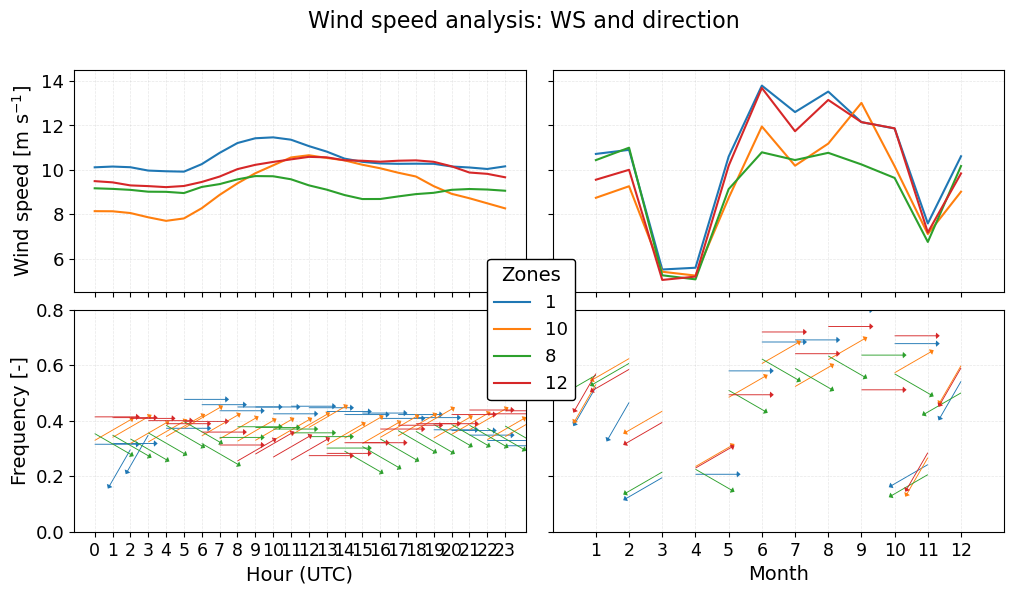

In [49]:
#matplotlib.rc('text', usetex=True)


zones = [1,10,8,12]
clol = ['C0','C1','C2','C3']
colores= dict(zip(zones,clol))

f, axarr = plt.subplots(2, 2, sharex='col',sharey='row', figsize=(12,6))
ax1 = axarr[0, 0]; ax2 = axarr[0, 1]; ax3 = axarr[1, 0]; ax4 = axarr[1, 1]

####### ax1 ################

for z in zones:
    M1 = collect_p[z]
    ax1.plot(M1['mean_h']['mean'],color=colores[z])
    
ax1.grid(ls='dashed',alpha=0.3, linewidth=0.5)
ax1.set_ylabel(r'Wind speed [m s$^{-1}$]',fontsize = 14)
for tick in ax1.yaxis.get_ticklabels():
    tick.set_fontsize(13)
ax1.set_ylim(4.5,14.5)

####### ax2 ################
for z in zones:
    M1 = collect_p[z]
    ax2.plot(M1['mean_m']['mean'],color=colores[z])
    
ax2.grid(ls='dashed',alpha=0.3, linewidth=0.5)


####### ax3 ################
for z in zones:
    M1 = collect_p[z]
    ax3.quiver(M1['direc_h'].index,M1['direc_h']['frecuencia']/100,M1['vec']['u_h'],
               M1['vec']['v_h'],width=0.0020,scale=10, headlength=4, headwidth=7,color=colores[z])

ax3.grid(ls='dashed',alpha=0.3, linewidth=0.5)
ax3.xaxis.set_ticks(M0['direc_h'].index)
ax3.set_xlabel(r'Hour (UTC)',fontsize = 14)
for tick in ax3.xaxis.get_ticklabels():
    tick.set_fontsize(12.5)
ax3.set_ylabel(r'Frequency [-]',fontsize = 14)
for tick in ax3.yaxis.get_ticklabels():
    tick.set_fontsize(13)

####### ax4 ################
for z in zones:
    M1 = collect_p[z]
    ax4.quiver(M1['direc_m'].index,M1['direc_m']['frecuencia']/100,M1['vec']['u_m'],
               M1['vec']['v_m'],width=0.0020,scale=10, headlength=4, headwidth=7, color=colores[z])

ax4.axis([-0.3, len(M0['vec']['u_m'])+1.3,0, .8])
ax4.grid(ls='dashed',alpha=0.3, linewidth=0.5)
ax4.xaxis.set_ticks(M0['direc_m'].index)
ax4.set_xlabel(u'Month',fontsize = 14)
for tick in ax4.xaxis.get_ticklabels():
    tick.set_fontsize(12.5)

lege = f.legend([x for x in zones], bbox_to_anchor=(.55,.58), fontsize=13, edgecolor='black',title="Zones",title_fontsize=14,framealpha=1)
lege.set_zorder(5)
f.subplots_adjust(hspace=0.08, wspace=0.06)
# title
f.suptitle('Wind speed analysis: WS and direction', fontsize=16)

#for svp in ["pdf","png"]:
#    plt.savefig("Fig/hourly_monthly_wp0.%s" % svp, dpi=350, bbox_inches='tight')

# add a plot that shows the wind direction arrows for the other zones


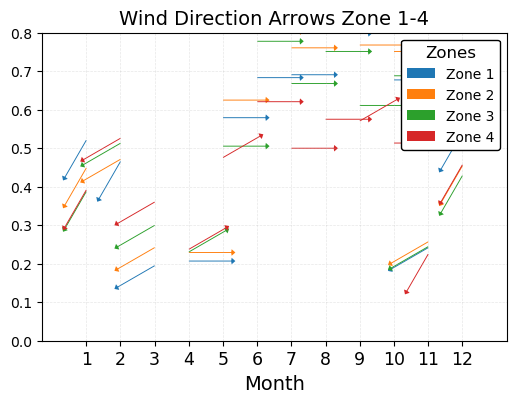

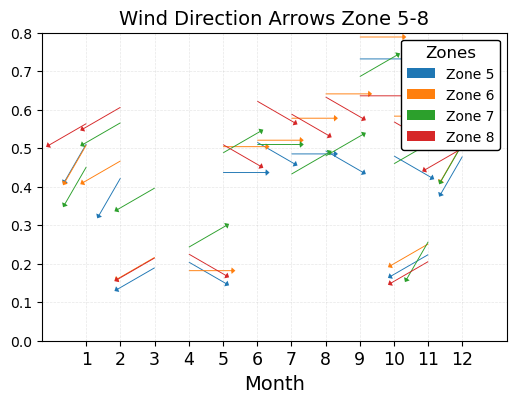

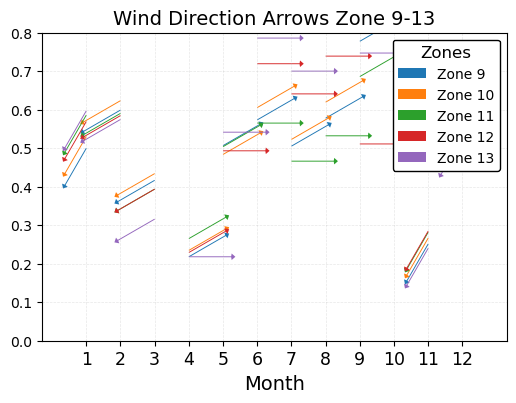

In [ ]:
zones = [1, 2, 3, 4]
clol = ['C0', 'C1', 'C2', 'C3']
colores = dict(zip(zones, clol))

# Create a single figure with only one subplot
fig, ax4 = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed

####### ax4 ################
for z in zones:
    M1 = collect_p[z]
    ax4.quiver(M1['direc_m'].index, M1['direc_m']['frecuencia'] / 100, 
               M1['vec']['u_m'], M1['vec']['v_m'],
               width=0.0020, scale=10, headlength=4, headwidth=7, color=colores[z])

ax4.axis([-0.3, len(M0['vec']['u_m']) + 1.3, 0, .8])
ax4.grid(ls='dashed', alpha=0.3, linewidth=0.5)
ax4.xaxis.set_ticks(M0['direc_m'].index)
ax4.set_xlabel(u'Month', fontsize=14)
for tick in ax4.xaxis.get_ticklabels():
    tick.set_fontsize(12.5)

# Add legend
lege = ax4.legend([f"Zone {x}" for x in zones], fontsize=10, edgecolor='black', title="Zones", title_fontsize=12, framealpha=1)
lege.set_zorder(5)

# Title
ax4.set_title('Wind Direction Arrows Zone 1-4', fontsize=14)

zones = [5, 6, 7, 8]
clol = ['C0', 'C1', 'C2', 'C3']
colores = dict(zip(zones, clol))

# Create a single figure with only one subplot
fig, ax4 = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed

####### ax4 ################
for z in zones:
    M1 = collect_p[z]
    ax4.quiver(M1['direc_m'].index, M1['direc_m']['frecuencia'] / 100, 
               M1['vec']['u_m'], M1['vec']['v_m'],
               width=0.0020, scale=10, headlength=4, headwidth=7, color=colores[z])

ax4.axis([-0.3, len(M0['vec']['u_m']) + 1.3, 0, .8])
ax4.grid(ls='dashed', alpha=0.3, linewidth=0.5)
ax4.xaxis.set_ticks(M0['direc_m'].index)
ax4.set_xlabel(u'Month', fontsize=14)
for tick in ax4.xaxis.get_ticklabels():
    tick.set_fontsize(12.5)

# Add legend
lege = ax4.legend([f"Zone {x}" for x in zones], fontsize=10, edgecolor='black', title="Zones", title_fontsize=12, framealpha=1)
lege.set_zorder(5)

# Title
ax4.set_title('Wind Direction Arrows Zone 5-8', fontsize=14)

zones = [9, 10, 11, 12, 13]
clol = ['C0', 'C1', 'C2', 'C3', 'C4']
colores = dict(zip(zones, clol))
# Create a single figure with only one subplot
fig, ax4 = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed

####### ax4 ################
for z in zones:
    M1 = collect_p[z]
    ax4.quiver(M1['direc_m'].index, M1['direc_m']['frecuencia'] / 100, 
               M1['vec']['u_m'], M1['vec']['v_m'],
               width=0.0020, scale=10, headlength=4, headwidth=7, color=colores[z])

ax4.axis([-0.3, len(M0['vec']['u_m']) + 1.3, 0, .8])
ax4.grid(ls='dashed', alpha=0.3, linewidth=0.5)
ax4.xaxis.set_ticks(M0['direc_m'].index)
ax4.set_xlabel(u'Month', fontsize=14)
for tick in ax4.xaxis.get_ticklabels():
    tick.set_fontsize(12.5)

# Add legend
lege = ax4.legend([f"Zone {x}" for x in zones], fontsize=10, edgecolor='black', title="Zones", title_fontsize=12, framealpha=1)
lege.set_zorder(5)

# Title
ax4.set_title('Wind Direction Arrows Zone 9-13', fontsize=14)

plt.show()


Wind roses per monthly average

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import windrose
from mpl_toolkits.axes_grid1 import inset_locator
import numpy as np

# Loop over each month and generate a wind rose map per wind farm
for month in range(1, 13):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

    # Plot wind farm boundaries
    gds.plot(ax=ax, facecolor="none", edgecolor="black")

    pon_nc = {}  # Save all points for later
    for x in coodex:
        # Get real coordinates of wind farm centroid
        cham_lon, cham_lat = coodex[x]

        # Select the wind data for this wind farm at 150 m height and the correct month
        pont1 = wp0.isel(south_north=idexp[x][0][0], west_east=idexp[x][1][0], height=3)
        pont1 = pont1.sel(time=pont1['time.month'] == month)  # Select data for this month

        # Skip if no data for this month
        if pont1.WS.size == 0:
            continue

        pon_nc[x] = pont1

        # Create inset axes for wind rose at wind farm location
        wrax_cham = inset_locator.inset_axes(
            ax, width=0.52, height=0.52, loc='center',
            bbox_to_anchor=(cham_lon, cham_lat), bbox_transform=ax.transData,
            axes_class=windrose.WindroseAxes
        )

        # Convert to NumPy arrays to avoid errors
        wind_dirs = np.array(pont1.WD.values).flatten()
        wind_speeds = np.array(pont1.WS.values).flatten()

        # Plot wind rose
        bins = np.arange(0, 18, 2)
        wrax_cham.bar(wind_dirs, wind_speeds, normed=True, bins=bins, opening=0.9, nsector=12)
        wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
        wrax_cham.axis('off')

    # Add legend for wind speed
    leg_wind = wrax_cham.legend(
        bbox_to_anchor=(-0.2, 1.2), title='wind speed [m/s]',
        title_fontsize=6, fontsize=5, edgecolor='black'
    )

    ax.coastlines('10m', alpha=0.3)
    ax.set_yticks([7.6, 7.8, 8.0, 8.2], crs=ccrs.PlateCarree())
    ax.set_xticks([77.5, 78.0], crs=ccrs.PlateCarree())

    # Title for the month
    ax.set_title(f'Wind Roses Per Wind Farm - Month {month}', fontsize=14)

    # Save figure
    plt.savefig(f'wind_roses_month_{month}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close to free memory

    plt.show()


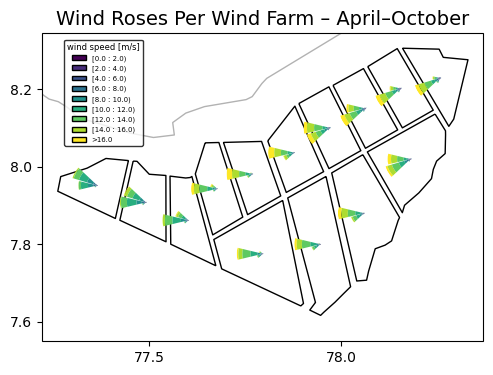

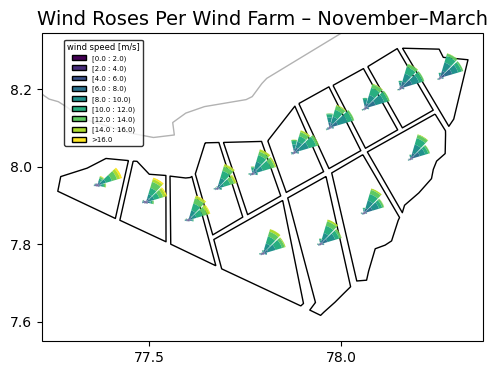

In [54]:
# Plots for the two seasons: April-October and November-March

# Define your two seasonal periods
seasons = {
    "April–October": list(range(4, 11)),      # months 4 to 10
    "November–March": [11, 12, 1, 2, 3]        # wrap-around months
}

for season_name, months_list in seasons.items():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

    # Plot wind farm boundaries
    gds.plot(ax=ax, facecolor="none", edgecolor="black")

    for x in coodex:
        cham_lon, cham_lat = coodex[x]

        # Select the wind data at the correct wind farm location and height
        pont1 = wp0.isel(south_north=idexp[x][0][0], west_east=idexp[x][1][0], height=3)

        # Filter time to include only selected months
        pont1 = pont1.sel(time=pont1['time.month'].isin(months_list))

        if pont1.WS.size == 0:
            continue

        # Create inset axes for wind rose
        wrax_cham = inset_locator.inset_axes(
            ax, width=0.52, height=0.52, loc='center',
            bbox_to_anchor=(cham_lon, cham_lat), bbox_transform=ax.transData,
            axes_class=windrose.WindroseAxes
        )

        # Extract direction and speed as NumPy arrays
        wind_dirs = np.array(pont1.WD.values).flatten()
        wind_speeds = np.array(pont1.WS.values).flatten()

        # Plot wind rose
        bins = np.arange(0, 18, 2)
        wrax_cham.bar(wind_dirs, wind_speeds, normed=True, bins=bins, opening=0.9, nsector=12)
        wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
        wrax_cham.axis('off')

    # Add legend
    leg_wind = wrax_cham.legend(
        bbox_to_anchor=(-0.2, 1.2), title='wind speed [m/s]',
        title_fontsize=6, fontsize=5, edgecolor='black'
    )

    ax.coastlines('10m', alpha=0.3)
    ax.set_yticks([7.6, 7.8, 8.0, 8.2], crs=ccrs.PlateCarree())
    ax.set_xticks([77.5, 78.0], crs=ccrs.PlateCarree())

    ax.set_title(f'Wind Roses Per Wind Farm – {season_name}', fontsize=14)
    plt.savefig(f'wind_roses_{season_name.replace("–", "-").replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    #plt.close(fig)
    plt.show(fig)  # Close to free memory


In [ ]:
# Choose variable: 'STAB' (stability) or 'TKE' (turbulence intensity)
variable = 'STAB'  # Change to 'TKE' for turbulence intensity

# Define stability categories based on your dataset
bins = [1, 2, 3, 4, 5, 6, 7, 8]  # Use integer values from the dataset
bin_labels = [
    "Very Unstable (1)", 
    "Unstable (2)", 
    "Neutral Unstable (3)", 
    "Neutral (4)", 
    "Neutral Stable (5)", 
    "Stable (6)", 
    "Very Stable (7)"
]

# Loop over each month and generate a wind rose map per wind farm
for month in range(1, 13):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

    # Plot wind farm boundaries
    gds.plot(ax=ax, facecolor="none", edgecolor="black")

    pon_nc = {}  # Save all points for later
    for x in coodex:
        # Get real coordinates of wind farm centroid
        cham_lon, cham_lat = coodex[x]

        # Select the wind data for this wind farm at 150 m height and the correct month
        pont1 = wp0.isel(south_north=idexp[x][0][0], west_east=idexp[x][1][0], height=3)
        pont1 = pont1.sel(time=pont1['time.month'] == month)  # Select data for this month

        # Skip if no data for this month
        if pont1.WD.size == 0:
            continue

        pon_nc[x] = pont1

        # Create inset axes for wind rose at wind farm location
        wrax_cham = inset_locator.inset_axes(
            ax, width=0.52, height=0.52, loc='center',
            bbox_to_anchor=(cham_lon, cham_lat), bbox_transform=ax.transData,
            axes_class=windrose.WindroseAxes
        )

        # Convert to NumPy arrays to avoid errors
        wind_dirs = np.array(pont1.WD.values).flatten()
        stability_classes = np.array(pont1[variable].values).flatten()  # Use integer stability classes

        # Plot wind rose with stability categories
        wrax_cham.bar(wind_dirs, stability_classes, normed=True, bins=bins, opening=0.9, nsector=12)
        wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
        wrax_cham.axis('off')

    # Add legend with explicit stability class labels
    leg_wind = wrax_cham.legend(
        bbox_to_anchor=(-0.2, 1.2), title=f'{variable} Categories',
        labels=bin_labels, title_fontsize=6, fontsize=5, edgecolor='black'
    )

    ax.coastlines('10m', alpha=0.3)
    ax.set_yticks([7.6, 7.8, 8.0, 8.2], crs=ccrs.PlateCarree())
    ax.set_xticks([77.5, 78.0], crs=ccrs.PlateCarree())

    # Title for the month
    ax.set_title(f'Wind Roses Per Wind Farm - {variable} - Month {month}', fontsize=14)

    # Save figure
    plt.savefig(f'wind_roses_{variable}_month_{month}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close to free memory

    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import windrose
from mpl_toolkits.axes_grid1 import inset_locator
import numpy as np

# Choose variable: 'STAB' (stability) or 'TKE' (turbulence intensity)
variable = 'TKE'  # Now using Turbulence Intensity (TKE)

# Define bins for turbulence intensity (TKE)
bins = [0, 0.05, 0.10, 0.20, 0.30, 0.50]  # Define reasonable TKE categories
bin_labels = [
    "Very Low TKE (<0.05)", 
    "Low TKE (0.05 - 0.10)", 
    "Moderate TKE (0.10 - 0.20)", 
    "High TKE (0.20 - 0.30)", 
    "Very High TKE (>0.30)"
]

# Loop over each month and generate a wind rose map per wind farm
for month in range(1, 13):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

    # Plot wind farm boundaries
    gds.plot(ax=ax, facecolor="none", edgecolor="black")

    pon_nc = {}  # Save all points for later
    for x in coodex:
        # Get real coordinates of wind farm centroid
        cham_lon, cham_lat = coodex[x]

        # Select the wind data for this wind farm at 150 m height and the correct month
        pont1 = wp0.isel(south_north=idexp[x][0][0], west_east=idexp[x][1][0], height=3)
        pont1 = pont1.sel(time=pont1['time.month'] == month)  # Select data for this month

        # Skip if no data for this month
        if pont1.WD.size == 0:
            continue

        pon_nc[x] = pont1

        # Create inset axes for wind rose at wind farm location
        wrax_cham = inset_locator.inset_axes(
            ax, width=0.52, height=0.52, loc='center',
            bbox_to_anchor=(cham_lon, cham_lat), bbox_transform=ax.transData,
            axes_class=windrose.WindroseAxes
        )

        # Convert to NumPy arrays to avoid errors
        wind_dirs = np.array(pont1.WD.values).flatten()
        turbulence_values = np.array(pont1[variable].values).flatten()  # Use TKE values

        # Plot wind rose with turbulence intensity categories
        wrax_cham.bar(wind_dirs, turbulence_values, normed=True, bins=bins, opening=0.9, nsector=12)
        wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
        wrax_cham.axis('off')

    # Add legend with explicit turbulence intensity labels
    leg_wind = wrax_cham.legend(
        bbox_to_anchor=(-0.2, 1.2), title=f'{variable} Categories',
        labels=bin_labels, title_fontsize=6, fontsize=5, edgecolor='black'
    )

    ax.coastlines('10m', alpha=0.3)
    ax.set_yticks([7.6, 7.8, 8.0, 8.2], crs=ccrs.PlateCarree())
    ax.set_xticks([77.5, 78.0], crs=ccrs.PlateCarree())

    # Title for the month
    ax.set_title(f'Wind Roses Per Wind Farm - {variable} - Month {month}', fontsize=14)

    # Save figure
    plt.savefig(f'wind_roses_{variable}_month_{month}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close to free memory

    plt.show()


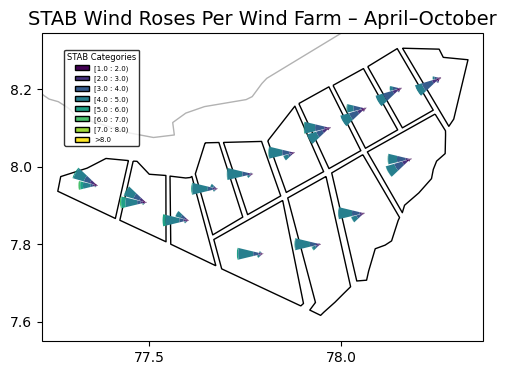

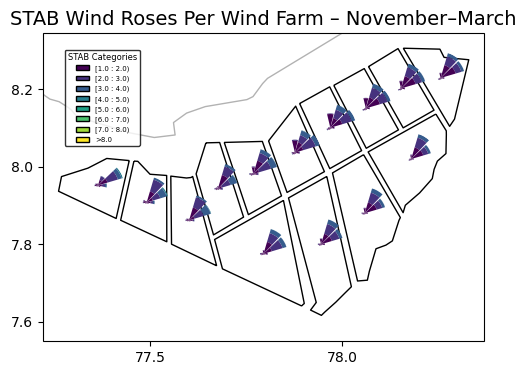

In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import windrose
from mpl_toolkits.axes_grid1 import inset_locator
import numpy as np

# Choose variable: 'STAB' (stability) or 'TKE' (turbulence intensity)
variable = 'STAB'  # or 'TKE'

# Define stability categories
bins = [1, 2, 3, 4, 5, 6, 7, 8]  # Note: last bin is exclusive by default
bin_labels = [
    "Very Unstable (1)", 
    "Unstable (2)", 
    "Neutral Unstable (3)", 
    "Neutral (4)", 
    "Neutral Stable (5)", 
    "Stable (6)", 
    "Very Stable (7)"
]

# Define seasonal groups
seasons = {
    "April–October": list(range(4, 11)),
    "November–March": [11, 12, 1, 2, 3]
}

for season_name, months_list in seasons.items():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

    # Plot wind farm boundaries
    gds.plot(ax=ax, facecolor="none", edgecolor="black")

    for x in coodex:
        cham_lon, cham_lat = coodex[x]

        # Select the wind data at correct location, height, and season
        pont1 = wp0.isel(south_north=idexp[x][0][0], west_east=idexp[x][1][0], height=3)
        pont1 = pont1.sel(time=pont1['time.month'].isin(months_list))

        if pont1[variable].size == 0:
            continue

        # Create inset axes
        wrax_cham = inset_locator.inset_axes(
            ax, width=0.52, height=0.52, loc='center',
            bbox_to_anchor=(cham_lon, cham_lat), bbox_transform=ax.transData,
            axes_class=windrose.WindroseAxes
        )

        # Convert to NumPy arrays
        wind_dirs = np.array(pont1.WD.values).flatten()
        stability_values = np.array(pont1[variable].values).flatten()

        # Plot wind rose
        wrax_cham.bar(wind_dirs, stability_values, normed=True, bins=bins, opening=0.9, nsector=12)
        wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
        wrax_cham.axis('off')

    # Add legend
    leg_wind = wrax_cham.legend(
        bbox_to_anchor=(-0.2, 1.2), title=f'{variable} Categories',
        labels=bin_labels, title_fontsize=6, fontsize=5, edgecolor='black'
    )

    ax.coastlines('10m', alpha=0.3)
    ax.set_yticks([7.6, 7.8, 8.0, 8.2], crs=ccrs.PlateCarree())
    ax.set_xticks([77.5, 78.0], crs=ccrs.PlateCarree())

    ax.set_title(f'{variable} Wind Roses Per Wind Farm – {season_name}', fontsize=14)

    # Save and show
    plt.savefig(f'wind_roses_{variable}_{season_name.replace("–", "-").replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()
    # plt.close(fig)  # Optional: close if looping through many figures


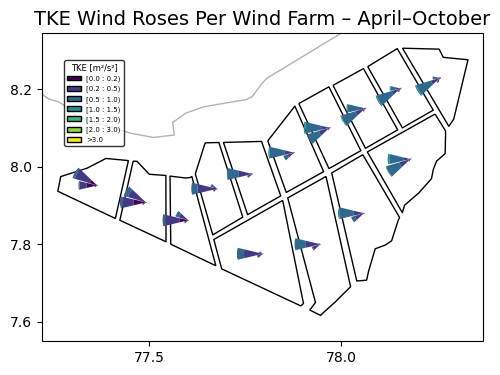

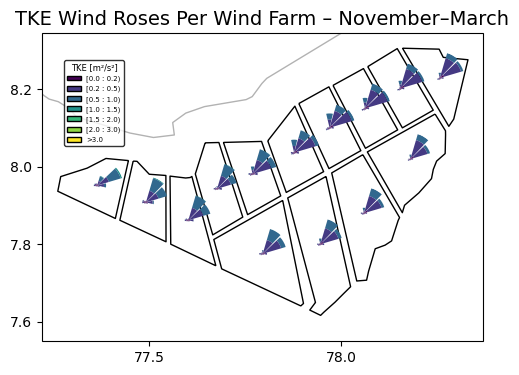

In [58]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import windrose
from mpl_toolkits.axes_grid1 import inset_locator
import numpy as np

# Variable to plot
variable = 'TKE'

# Define bins for TKE values (in m²/s²), adjust as needed
bins = [0, 0.2, 0.5, 1.0, 1.5, 2.0, 3.0]  
bin_labels = [
    "0–0.2", "0.2–0.5", "0.5–1.0", 
    "1.0–1.5", "1.5–2.0", "2.0–3.0"
]

# Define seasonal groups
seasons = {
    "April–October": list(range(4, 11)),
    "November–March": [11, 12, 1, 2, 3]
}

for season_name, months_list in seasons.items():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([77.22, 78.37, 7.55, 8.345], crs=ccrs.PlateCarree())

    # Plot wind farm boundaries
    gds.plot(ax=ax, facecolor="none", edgecolor="black")

    for x in coodex:
        cham_lon, cham_lat = coodex[x]

        # Select the wind data at correct location, height, and season
        pont1 = wp0.isel(south_north=idexp[x][0][0], west_east=idexp[x][1][0], height=3)
        pont1 = pont1.sel(time=pont1['time.month'].isin(months_list))

        if pont1[variable].size == 0:
            continue

        # Create inset axes for wind rose
        wrax_cham = inset_locator.inset_axes(
            ax, width=0.52, height=0.52, loc='center',
            bbox_to_anchor=(cham_lon, cham_lat), bbox_transform=ax.transData,
            axes_class=windrose.WindroseAxes
        )

        # Convert to NumPy arrays
        wind_dirs = np.array(pont1.WD.values).flatten()
        tke_values = np.array(pont1[variable].values).flatten()

        # Plot wind rose for TKE
        wrax_cham.bar(wind_dirs, tke_values, normed=True, bins=bins, opening=0.9, nsector=12)
        wrax_cham.tick_params(labelleft=False, labelbottom=False, grid_alpha=0.2)
        wrax_cham.axis('off')

    # Add legend with TKE bins
    leg_wind = wrax_cham.legend(
        bbox_to_anchor=(-0.2, 1.2), title='TKE [m²/s²]',
        labels=bin_labels, title_fontsize=6, fontsize=5, edgecolor='black'
    )

    ax.coastlines('10m', alpha=0.3)
    ax.set_yticks([7.6, 7.8, 8.0, 8.2], crs=ccrs.PlateCarree())
    ax.set_xticks([77.5, 78.0], crs=ccrs.PlateCarree())

    ax.set_title(f'TKE Wind Roses Per Wind Farm – {season_name}', fontsize=14)

    # Save and show
    plt.savefig(f'wind_roses_TKE_{season_name.replace("–", "-").replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()


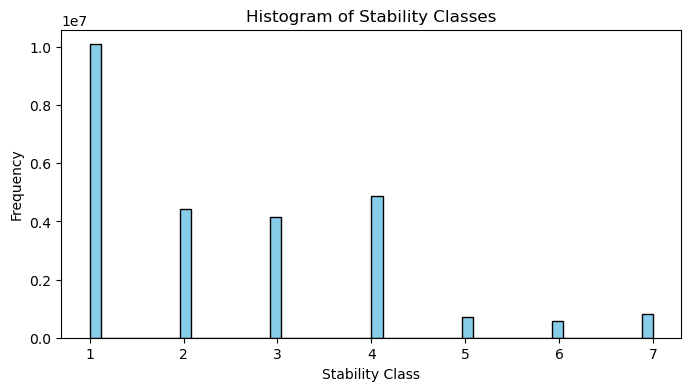

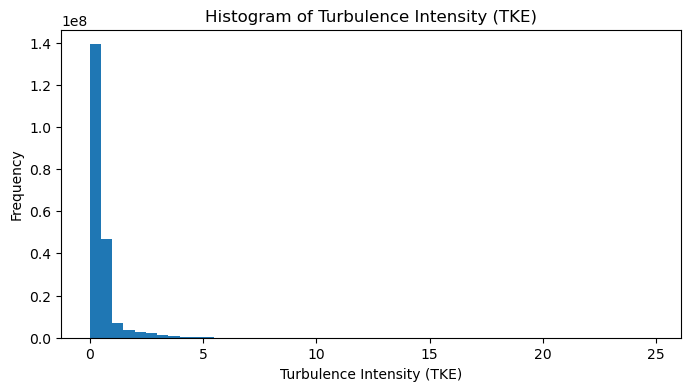

In [ ]:
# simple histogram to plot all stabilities
fig, ax = plt.subplots(figsize=(8, 4))
wp0['STAB'].plot.hist(ax=ax, bins=50, color='skyblue', edgecolor='black')
ax.set_title('Histogram of Stability Classes')
ax.set_xlabel('Stability Class')
ax.set_ylabel('Frequency')
plt.show()

# simple histogram to plot all turbulence intensities
fig, ax = plt.subplots(figsize=(8, 4))
wp0['TKE'].plot.hist(ax=ax, bins=50)
ax.set_title('Histogram of Turbulence Intensity (TKE)')
ax.set_xlabel('Turbulence Intensity (TKE)')
ax.set_ylabel('Frequency')
plt.show()